# Análisis exploratorio de datos

## Unidad 6: Correlaciones

**Índice**   
1. [Correlación: definición e importancia](#id1)
2. [Impacto de la presencia de variables correlacionadas en el análisis de
datos](#id2)
3. [Detección de correlación entre variables](#id3)
4. [Gestión de variables correlacionadas](#id4)
5. [Extra - Cómo juntar datasets](#id5)

### 1. Correlación: definición e importancia <a name="id1"></a>

La correlación es una medida estadística que describe la relación entre dos o más variables. La correlación nos da información sobre la fuerza y la dirección de la relación entre las variables.

La correlación se expresa mediante un coeficiente de correlación, que puede variar entre -1 y 1.

- Un coeficiente de valor 1 indica que las dos variables augmentan del mismo modo.  

- Un coeficiente de valor 0 indica que no hay correlación, las variables no muestran ninguna relación lineal.

- Un coeficiente de valor -1 indica que las variables disminuyen del mismo modo.

El método de correlación de Pearson es el más común, aunque también hay otras opciones como la correlación de Spearman y la correlación de Kendall, que son útiles cuando las relaciones no son necesariamente lineales.


El análisis de correlación puede revelar relaciones significativas entre diferentes variables o grupos de variables. Esta información puede proporcionar nuevos conocimientos y revelar interdependencias, incluso si las métricas perecen no estar relacionadas a priori.

Es importante destacar que la correlación no implica causalidad. Aunque dos variables pueden estar correlacionadas, esto no significa necesariamente que una variable cause la otra. Puede haber otras variables o factores que también estén involucrados.

### 2. Impacto de la presencia de variables correlacionadas en el análisis de datos <a name="id2"></a>


Estudiar la correlación entre las variables de un dataset es un paso clave en el análisis exploratorio de los datos, ya que nos permite entender mejor con qué datos estamos trabajando. Por otro lado, la detección de variables correlacionadas puede dar lugar a dos situaciones relevantes:
la presencia de variables con información redundante y los problemas de la multicolinealidad.

**Variables con información redundante**

Si se demuestra que existe una fuerte correlación entre dos variables, y se observa que una de ellas actúa de una manera particular, entonces se puede concluir que la otra también se verá afectada de manera similar. Esto ayuda a agrupar métricas relacionadas para reducir la cantidad de datos con los que trabajar.

**Multicolinealidad**

La presencia de variables independientes correlacionadas en una regresión se llama **multicolinealidad**. Las variables en una regresión tienen que ser independientes, ya que si hay variables con un nivel alto de correlación, no se puede aislar la relación entre cada variable independiente y la variable dependiente.
Es decir, cuando hay variables independientes muy correlacionadas, los cambios en una variable están asociados con cambios en otra variable y, por tanto, los coeficientes de regresión del modelo ya no van a medir el efecto de una variable independiente sobre la respuesta manteniendo constante el resto de predictores.

La multicolinealidad provoca los problemas siguientes:
- El valor de los coeficientes de regresión del modelo cambia si se incluyen o no otras variables independientes, y por lo tanto dificulta la interpretación del modelo.
- La significación estadística (p-valor) de los coeficientes de regresión del modelo se vuelve menos fiable. Por lo tanto es difícil identificar variables independientes a incluir en el modelo.

Sin embargo, la multicolinealidad solo afecta los coeficientes y los p-valores; no influye en las predicciones, ni en la precisión de las predicciones.

### 3. Detección de correlación entre variables <a name="id3"></a>

La correlación entre variables, o en concreto, la multicolinealidad, puede detectarse mirando la matriz de correlación. En otros casos, cuando la multicolinealidad es más sutil o involucra dos o más variables, se puede calcular **el factor de inflación de la varianza** (VIF).

Los valores que tenemos que tener en cuenta son:

- VIF=1 significa que no existe correlación entre esta variable independiente y cualquier otra.
- 1< VIF < 5 sugiere una correlación moderada pero no sería necesario resolverla.
- VIF > 5 son niveles altos de multicolinealidad.

### 4. Gestión de variables correlacionadas <a name="id4"></a>

La primera pregunta que tenemos que hacer es si es necesario corregir la multicolinealidad. Si esta no es muy alta o no afecta a las variables relevantes para el análisis, o si solo queremos realizar predicciones sin interpretar los coeficientes, entonces no hace falta centrarnos en tratar la correlación entre variables.

Si es necesario corregir la multicolinealidad, tenemos que saber primero si es una estructural o propia de los datos.


**Multicolinealidad estructural**

La multicolinealidad estructural se produce cuando una variable es una combinación lineal perfecta de otras variables en el modelo. Este tipo se trata normalmente eliminando una de las variables correlacionadas.

**Multicolinealidad en los datos**

La multicolinealidad en los datos ocurre cuando las variables predictoras en sí mismas están altamente correlacionadas. En este caso, se tiene que valorar qué método de corrección es mas adecuado para los objetivos del análisis. Algunas opciones son:

- Eliminar algunas de las variables independientes altamente correlacionadas.
- Combinar linealmente las variables independientes, e.g. realizar un PCA para crear nuevos predictores independientes y volver a ajustar el modelo de regresión con ellos.
- Realizar una regresión que pueda tratar la multicolinealidad, e.g. LASSO y la regresión de Ridge.
- Estandarización de las variables para mejorar la estabilidad numérica del modelo.

Haciendo esto último, el modelo en si (el R-cuadrado  y predicciones) no cambía, y, en la mayoría de casos, se reduce el problema de la multicolinealidad (VIF < 5). El impacto que sí que podemos ver es que varíen los signos de los coeficientes de regresión y la significación estadística (p-valor)

Vamos a ver estudiar la correlación entre variables en nuestro dataset.

In [1]:
# Montamos la unidad Drive para acceder a los archivos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Especificamos la ruta hasta la carpeta donde tenemos los archivos de la Unidad 5-6
%cd /content/drive/MyDrive/Colab_Notebooks/Analisis_exploratorio_datos/Unidad5_6

Mounted at /content/drive
/content/drive/MyDrive/Colab_Notebooks/Analisis_exploratorio_datos/Unidad5_6


In [2]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np

# Cargamos el archivo csv en un DataFrame
starbucks_df = pd.read_csv(
    "data/starbucks_preproc_df.csv", encoding='utf-8', encoding_errors='replace'
    )

# Mostramos el tamaño del df
print("Tamaño df:\n", starbucks_df.shape)

# Mostramos el nombre de las columnas
print("Columnas del df:\n", starbucks_df.columns)

# Visualizamos las 3 primeras filas con el comando head()
starbucks_df.head(3)

Tamaño df:
 (110, 28)
Columnas del df:
 Index(['Beverage', 'Beverage_category', 'Beverage_prep', 'Milk_type',
       'Calories', 'Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)',
       'Sodium (mg)', 'Total Carbohydrates (g) ', 'Cholesterol (mg)',
       'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g) ', 'Vitamin A (% DV) ',
       'Vitamin C (% DV)', 'Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)',
       'Beverage_size', 'Beverage_category_Coffee',
       'Beverage_category_Espresso Drink', 'Beverage_category_Frappuccino',
       'Beverage_category_Shaken Iced Beverages',
       'Beverage_category_Smoothies', 'Beverage_category_Tazo® Tea Drinks',
       'Milk_type_No Milk', 'Milk_type_Nonfat Milk'],
      dtype='object')


,Beverage,Beverage_category,Beverage_prep,Milk_type,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),...,Caffeine (mg),Beverage_size,Beverage_category_Coffee,Beverage_category_Espresso Drink,Beverage_category_Frappuccino,Beverage_category_Shaken Iced Beverages,Beverage_category_Smoothies,Beverage_category_Tazo® Tea Drinks,Milk_type_No Milk,Milk_type_Nonfat Milk
0,Brewed Coffee,Coffee,Short,No Milk,3,0.1,0.0,0.0,0,5,...,175,0,True,False,False,False,False,False,True,False
1,Brewed Coffee,Coffee,Tall,No Milk,4,0.1,0.0,0.0,0,10,...,260,1,True,False,False,False,False,False,True,False
2,Brewed Coffee,Coffee,Grande,No Milk,5,0.1,0.0,0.0,0,10,...,330,2,True,False,False,False,False,False,True,False


In [3]:
starbucks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Beverage                                 110 non-null    object 
 1   Beverage_category                        110 non-null    object 
 2   Beverage_prep                            110 non-null    object 
 3   Milk_type                                110 non-null    object 
 4   Calories                                 110 non-null    int64  
 5   Total Fat (g)                            110 non-null    float64
 6   Trans Fat (g)                            110 non-null    float64
 7   Saturated Fat (g)                        110 non-null    float64
 8   Sodium (mg)                              110 non-null    int64  
 9   Total Carbohydrates (g)                  110 non-null    int64  
 10  Cholesterol (mg)                         110 non-n

In [4]:
starbucks_df.columns

Index(['Beverage', 'Beverage_category', 'Beverage_prep', 'Milk_type',
       'Calories', 'Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)',
       'Sodium (mg)', 'Total Carbohydrates (g) ', 'Cholesterol (mg)',
       'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g) ', 'Vitamin A (% DV) ',
       'Vitamin C (% DV)', 'Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)',
       'Beverage_size', 'Beverage_category_Coffee',
       'Beverage_category_Espresso Drink', 'Beverage_category_Frappuccino',
       'Beverage_category_Shaken Iced Beverages',
       'Beverage_category_Smoothies', 'Beverage_category_Tazo® Tea Drinks',
       'Milk_type_No Milk', 'Milk_type_Nonfat Milk'],
      dtype='object')

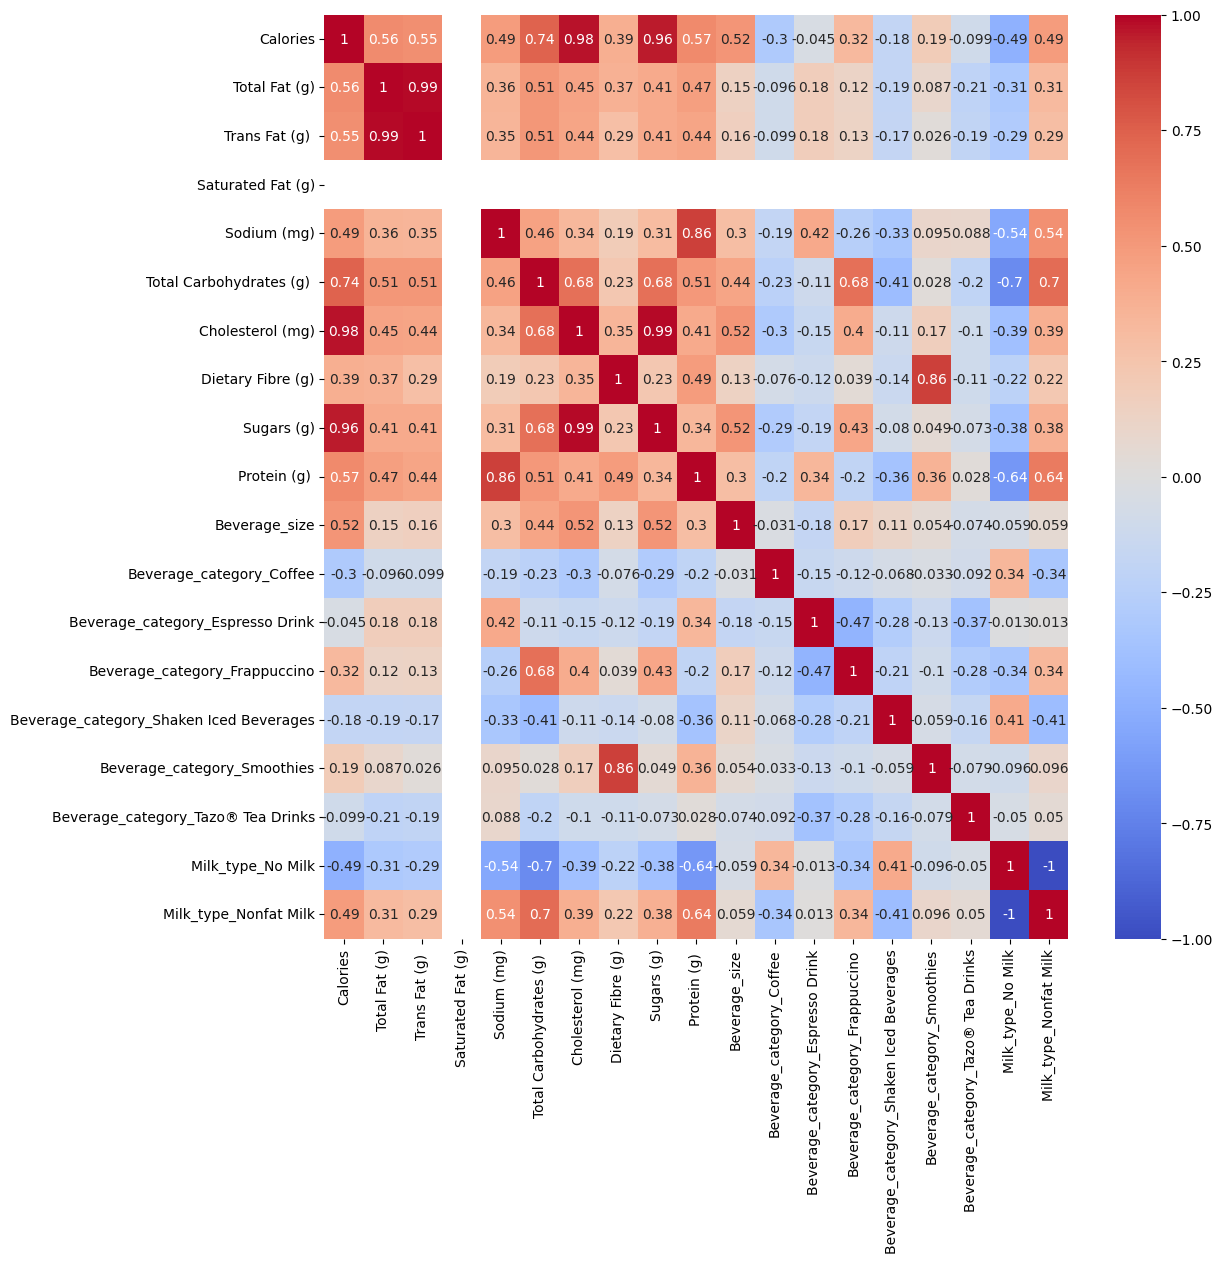

In [5]:
# 1. Matriz de correlación

# Cargamos las librerías necesarias
import seaborn as sns
import matplotlib.pyplot as plt

# Nos quedamos con las columnas numéricas
numeric_cols = list(starbucks_df.describe().columns)

# Nos quedamos con las columnas de booleanos
bool_cols = ['Beverage_category_Coffee',
       'Beverage_category_Espresso Drink', 'Beverage_category_Frappuccino',
       'Beverage_category_Shaken Iced Beverages',
       'Beverage_category_Smoothies', 'Beverage_category_Tazo® Tea Drinks',
       'Milk_type_No Milk', 'Milk_type_Nonfat Milk']

# Las convertimos a enteros
starbucks_df[bool_cols] = starbucks_df[bool_cols].astype(int)

# Filtramos por esas columnas
starbucks_num = starbucks_df[numeric_cols+bool_cols]

# Calculamos la matriz de correlación
correlation_matrix = starbucks_num.corr()

# Hacemos el gráfico con heatmap
plt.figure(figsize = (12,12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [6]:
# 2. VIF

# Cargamos las librerías necesarias
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# No incluímos en el análisis las variables vacías y la dependiente
list_toexclude = ['Calories','Saturated Fat (g)']

# Suponemos que queremos hacer un modelo para predecir las calorías
# Agregar constante si es necesario
X = add_constant(starbucks_num.drop(list_toexclude, axis=1))
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [
    variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                                   Variable         VIF
0                                     const    0.000000
1                             Total Fat (g)   96.793366
2                            Trans Fat (g)    87.003689
3                               Sodium (mg)    7.426039
4                  Total Carbohydrates (g)    26.708417
5                          Cholesterol (mg)  741.586080
6                         Dietary Fibre (g)   16.453179
7                                Sugars (g)  700.758000
8                              Protein (g)    14.807097
9                             Beverage_size    2.764671
10                 Beverage_category_Coffee         inf
11         Beverage_category_Espresso Drink         inf
12            Beverage_category_Frappuccino         inf
13  Beverage_category_Shaken Iced Beverages         inf
14              Beverage_category_Smoothies         inf
15       Beverage_category_Tazo® Tea Drinks         inf
16                        Milk_type_No Milk     

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


¡Vemos que hay bastantes variables correlacionadas! Vamos a analizar las más significativas:

- Milk_type_No Milk y Milk_type_Nonfat Milk son complementarias, cuando una es 1 la otra es 0, por lo tanto tiene mucho sentido que tengan un coeficiente VIF muy alto (inf). En este caso pues, tendría sentido quedarnos solo con 1 de ellas.

- Las columnas de Beverage_category son complementarias, ya que si una de ellas tiene valor 1, las otras serán 0. Por lo tanto, una de ellas tiene información redundante. Por este motivo, podemos eliminar una.

- La variable Sugars (g) también tiene un coeficiente VIF muy alto (700.75). Si miramos la matriz de correlación, podemos ver que está muy correlacionada con Cholesterol (mg), por lo tanto, tendría sentido incluir solo una de ellas, ya que están muy relacionadas.

- Total Fat (g) y Trans Fat (g) también tienen un coeficiente alto (96.79 y 87) y están muy correlacionadas entre ellas. Así pues, podemos escoger solo una de ellas para el modelo.

In [7]:
# Comprobamos VIF de nuevo

# No incluímos en el análisis las variables vacías y la dependiente
# También excluimos variables correlacionadas después del analisis de los VIF
list_toexclude = ['Calories','Saturated Fat (g)',
                  'Beverage_category_Tazo® Tea Drinks',
                  'Milk_type_Nonfat Milk','Cholesterol (mg)','Trans Fat (g) ']

# Suponemos que queremos hacer un modelo para predecir las calorías
# Agregar constante si es necesario
X = add_constant(starbucks_num.drop(list_toexclude, axis=1))
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [
    variance_inflation_factor(X.values, i) for i in range(X.shape[1])
    ]

print(vif_data)

                                   Variable        VIF
0                                     const  16.463054
1                             Total Fat (g)   2.820072
2                               Sodium (mg)   7.425483
3                  Total Carbohydrates (g)   24.785363
4                         Dietary Fibre (g)   7.937237
5                                Sugars (g)   2.451553
6                              Protein (g)   14.526309
7                             Beverage_size   2.396258
8                  Beverage_category_Coffee   1.460662
9          Beverage_category_Espresso Drink   2.350116
10            Beverage_category_Frappuccino  16.753319
11  Beverage_category_Shaken Iced Beverages   1.913105
12              Beverage_category_Smoothies   5.799556
13                        Milk_type_No Milk   4.586444


¡Han mejorado mucho los VIF!

### 5. Cómo juntar datasets <a name="id5"></a>

Una tarea muy común en el análisis de datos es tener que juntar dos datasets, para poder analizar la información de estos de manera conjunta.

Hay distintas maneras de hacerlo con la librería pandas, dependiendo de cómo se quieren juntar los datasets:

- concat(): Se quiere juntar la información como filas/columnas extras. El df2 tiene que tener las mismas columnas/filas que el primero.

- join()/merge(): Se quiere añadir la información del nuevo dataset como columnas. En este caso, se tiene que identificar una clave comuna para poder unir df2 con df1.


La función `concat` en pandas se usa para concatenar (unir) objetos pandas a lo largo de un eje específico, ya sea a lo largo de las filas (axis=0) o a lo largo de las columnas (axis=1).

In [8]:
import pandas as pd

# Creamos dos df de ejemplo
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                    'B': ['B0', 'B1', 'B2'],
                    'C': ['C0', 'C1', 'C2']})

df2 = pd.DataFrame({'A': ['A3', 'A4', 'A5'],
                    'B': ['B3', 'B4', 'B5'],
                    'C': ['C3', 'C4', 'C5']})

# Los unimos como filas extras (axis=0)
resultado1 = pd.concat([df1, df2], axis=0)

# Mostramos el resultado
print(resultado1)


    A   B   C
0  A0  B0  C0
1  A1  B1  C1
2  A2  B2  C2
0  A3  B3  C3
1  A4  B4  C4
2  A5  B5  C5


In [9]:
# Creamos dos df de ejemplo
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                    'B': ['B0', 'B1', 'B2'],
                    'C': ['C0', 'C1', 'C2']})

df2 = pd.DataFrame({'D': ['D0', 'D1', 'D2'],
                    'E': ['E0', 'E1', 'E2'],
                    'F': ['F0', 'F1', 'F2']})

# Los unimos como columnas extras (axis=1)
resultado2 = pd.concat([df1, df2], axis=1)

# Mostramos el resultado
print(resultado2)


    A   B   C   D   E   F
0  A0  B0  C0  D0  E0  F0
1  A1  B1  C1  D1  E1  F1
2  A2  B2  C2  D2  E2  F2


La función `merge` en pandas se usa para combinar DataFrames en función de las columnas especificadas y permite fusiones más flexibles y complejas, como fusionar en índices o fusiones basadas en múltiples columnas. En cambio, `join` es un método específico de los objetos DataFrame en pandas. Se usa para combinar DataFrames en función de sus índices.

In [10]:
import pandas as pd

# Juntamos dos df con merge
df1 = pd.DataFrame({'clave': [1, 2, 3], 'valor': ['A', 'B', 'C']})
df2 = pd.DataFrame({'clave': [2, 3, 4], 'valor': ['X', 'Y', 'Z']})

resultado1 = pd.merge(df1, df2, on='clave', how='inner', suffixes=['_df1', '_df2'])
print(resultado1)



   clave valor_df1 valor_df2
0      2         B         X
1      3         C         Y


In [11]:
# Juntamos dos df con join
df1 = pd.DataFrame({'valor': ['A', 'B', 'C']}, index=[1, 2, 3])
df2 = pd.DataFrame({'valor': ['X', 'Y', 'Z']}, index=[2, 3, 4])

resultado2 = df1.join(df2, how='inner', lsuffix='_df1', rsuffix='_df2')
print(resultado2)

  valor_df1 valor_df2
2         B         X
3         C         Y


In [12]:
# Evaluamos las distintas tipos de maneras de juntar dfs

# Creamos dos DataFrames con información de empleados

data1 = {'ID': [1, 2, 3, 4],
         'Nombre': ['Juan', 'María', 'Carlos', 'Ana'],
         'Cargo': ['Analista', 'Gerente', 'Desarrollador', 'Analista']}
df_info_basica = pd.DataFrame(data1)

data2 = {'ID': [2, 3, 4, 5],
         'Salario': [60000, 80000, 55000, 70000],
         'Departamento': ['TI', 'Ventas', 'TI', 'Recursos Humanos']}
df_info_adicional = pd.DataFrame(data2)

print("DataFrame 1:")
print(df_info_basica)
print("\nDataFrame 2:")
print(df_info_adicional)


DataFrame 1:
   ID  Nombre          Cargo
0   1    Juan       Analista
1   2   María        Gerente
2   3  Carlos  Desarrollador
3   4     Ana       Analista

DataFrame 2:
   ID  Salario      Departamento
0   2    60000                TI
1   3    80000            Ventas
2   4    55000                TI
3   5    70000  Recursos Humanos


In [13]:
# Juntamos los df usando el ID como key y usando outer join
resultado_outer = pd.merge(df_info_basica, df_info_adicional, on='ID', how='outer')

# Mostramos los resultados
print("Resultado del merge con outer join:")
print(resultado_outer)

Resultado del merge con outer join:
   ID  Nombre          Cargo  Salario      Departamento
0   1    Juan       Analista      NaN               NaN
1   2   María        Gerente  60000.0                TI
2   3  Carlos  Desarrollador  80000.0            Ventas
3   4     Ana       Analista  55000.0                TI
4   5     NaN            NaN  70000.0  Recursos Humanos


In [14]:
# Juntamos los df usando el ID como key y usando left join
resultado_left = pd.merge(df_info_basica, df_info_adicional, on='ID', how='left')

# Mostramos los resultados
print("Resultado del merge con left join:")
print(resultado_left)


Resultado del merge con left join:
   ID  Nombre          Cargo  Salario Departamento
0   1    Juan       Analista      NaN          NaN
1   2   María        Gerente  60000.0           TI
2   3  Carlos  Desarrollador  80000.0       Ventas
3   4     Ana       Analista  55000.0           TI


In [15]:
# Juntamos los df usando el ID como key y usando right join
resultado_right = pd.merge(df_info_basica, df_info_adicional, on='ID', how='right')

# Mostramos los resultados
print("Resultado del merge con right join:")
print(resultado_right)

Resultado del merge con right join:
   ID  Nombre          Cargo  Salario      Departamento
0   2   María        Gerente    60000                TI
1   3  Carlos  Desarrollador    80000            Ventas
2   4     Ana       Analista    55000                TI
3   5     NaN            NaN    70000  Recursos Humanos


In [16]:
# Juntamos los df usando el ID como key y usando inner join
resultado_inner = pd.merge(df_info_basica, df_info_adicional, on='ID', how='inner')

# Mostramos los resultados
print("Resultado del merge con inner join:")
print(resultado_inner)

Resultado del merge con inner join:
   ID  Nombre          Cargo  Salario Departamento
0   2   María        Gerente    60000           TI
1   3  Carlos  Desarrollador    80000       Ventas
2   4     Ana       Analista    55000           TI
